In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch.nn as nn
import torch.optim as optim

In [3]:
from training import Coach
from utils import MnistData
from models import ModelManager, ModelType

In [4]:
data = MnistData()

In [5]:
simple, momentum, nesterov = [], [], []

In [12]:
for i in range(10):
    print(f'--- ({i}) ---')
    jelena = ModelManager.get_untrained(ModelType.MnistCnnJelena)
    Coach.train(
        jelena,
        data,
        nn.CrossEntropyLoss(reduction='sum'),
        optim.SGD(jelena.parameters(), lr=1e-3),
        30,
        5001,
        5000
    )
    simple.append(Coach.measure_performance(jelena, data))

--- (0) ---
Training started at 1645362203.6520457
Epoch 0: 69.06310272216797
Epoch 5000: 55.680816650390625
Training finished at 1645362239.1985333; lasted 35.54648756980896 seconds.
67.96 % success on test data
--- (1) ---
Training started at 1645362240.2837672
Epoch 0: 69.17224884033203
Epoch 5000: 47.80699157714844
Training finished at 1645362275.1876752; lasted 34.903908014297485 seconds.
84.61 % success on test data
--- (2) ---
Training started at 1645362276.2672343
Epoch 0: 69.08252716064453
Epoch 5000: 47.80065155029297
Training finished at 1645362311.6692917; lasted 35.4020574092865 seconds.
83.39999999999999 % success on test data
--- (3) ---
Training started at 1645362312.726179
Epoch 0: 69.08128356933594
Epoch 5000: 49.91312789916992
Training finished at 1645362350.4707444; lasted 37.74456548690796 seconds.
75.46000000000001 % success on test data
--- (4) ---
Training started at 1645362351.5325696
Epoch 0: 69.06108093261719
Epoch 5000: 49.837486267089844
Training finished a

In [7]:
for i in range(10):
    print(f'--- ({i}) ---')
    jelena = ModelManager.get_untrained(ModelType.MnistCnnJelena)
    Coach.train(
        jelena,
        data,
        nn.CrossEntropyLoss(reduction='sum'),
        optim.SGD(jelena.parameters(), lr=1e-2, momentum=0.9),
        30,
        5001,
        5000
    )
    momentum.append(Coach.measure_performance(jelena, data))

--- (0) ---
Training started at 1645361368.6443279
Epoch 0: 68.99908447265625
Epoch 5000: 68.83451843261719
Training finished at 1645361406.5304937; lasted 37.88616585731506 seconds.
9.8 % success on test data
--- (1) ---
Training started at 1645361407.4050858
Epoch 0: 68.94375610351562
Epoch 5000: 69.83451843261719
Training finished at 1645361444.1837823; lasted 36.77869653701782 seconds.
9.82 % success on test data
--- (2) ---
Training started at 1645361445.2376375
Epoch 0: 69.1108627319336
Epoch 5000: 70.83451843261719
Training finished at 1645361482.3139122; lasted 37.07627463340759 seconds.
9.82 % success on test data
--- (3) ---
Training started at 1645361483.4264328
Epoch 0: 69.16016387939453
Epoch 5000: 70.83451080322266
Training finished at 1645361521.2077582; lasted 37.781325340270996 seconds.
10.09 % success on test data
--- (4) ---
Training started at 1645361522.5007598
Epoch 0: 69.0565185546875
Epoch 5000: 67.83451843261719
Training finished at 1645361559.6628764; lasted 3

In [8]:
for i in range(10):
    print(f'--- ({i}) ---')
    jelena = ModelManager.get_untrained(ModelType.MnistCnnJelena)
    Coach.train(
        jelena,
        data,
        nn.CrossEntropyLoss(reduction='sum'),
        optim.SGD(jelena.parameters(), lr=1e-2, momentum=0.9, nesterov=True),
        30,
        5001,
        5000
    )
    nesterov.append(Coach.measure_performance(jelena, data))

--- (0) ---
Training started at 1645361748.4734504
Epoch 0: 69.24842834472656
Epoch 5000: 70.83451843261719
Training finished at 1645361788.206677; lasted 39.73322653770447 seconds.
11.35 % success on test data
--- (1) ---
Training started at 1645361789.1085331
Epoch 0: 68.93579864501953
Epoch 5000: 70.83451843261719
Training finished at 1645361827.8486285; lasted 38.740095376968384 seconds.
9.82 % success on test data
--- (2) ---
Training started at 1645361828.938427
Epoch 0: 69.04231262207031
Epoch 5000: 69.83451843261719
Training finished at 1645361867.2553313; lasted 38.31690430641174 seconds.
10.280000000000001 % success on test data
--- (3) ---
Training started at 1645361868.4986362
Epoch 0: 68.97080993652344
Epoch 5000: 71.83451843261719
Training finished at 1645361906.9695683; lasted 38.47093200683594 seconds.
10.280000000000001 % success on test data
--- (4) ---
Training started at 1645361908.2799723
Epoch 0: 69.09579467773438
Epoch 5000: 68.83451843261719
Training finished at

In [9]:
import matplotlib.pylab as lab

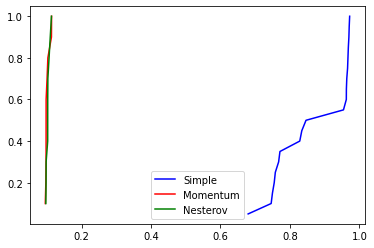

In [13]:
# for performences in [sorted(simple), sorted(momentum), sorted(nesterov)]:
performences = sorted(simple)
distribution = {}
for i in range(1, len(performences) + 1):
    distribution[performences[i - 1]] = i / len(performences)
my_list = distribution.items()
sorted(my_list)
x, y = zip(*my_list)
lab.plot(x, y, color = "blue", label="Simple")

performences = sorted(momentum)
distribution = {}
for i in range(1, len(performences) + 1):
    distribution[performences[i - 1]] = i / len(performences)
my_list = distribution.items()
sorted(my_list)
x, y = zip(*my_list)
lab.plot(x, y, color = "red", label="Momentum")

performences = sorted(nesterov)
distribution = {}
for i in range(1, len(performences) + 1):
    distribution[performences[i - 1]] = i / len(performences)
my_list = distribution.items()
sorted(my_list)
x, y = zip(*my_list)
lab.plot(x, y, color="green", label="Nesterov")

lab.legend()